# **Question 1 - Singular Value Decomposition**

## **a)** Proof

For the singular value decomposition of matrix **$A = USV^T$**:
- **U** is an $m \times m$ complex unitary matrix. The columns of U = $[u_1, u_2, ..., u_{\alpha}]$ are the left-singular vectors of A, and form an orthonormal basis for the column space.
- $S$ is an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal. These diagonal entries $s_{\alpha}$ are the singular values.
- $V^T$ is the transpose of an $n \times n$ complex unitary matrix. The columns of V = $[v_1, v_2, ..., v_{\alpha}]$ are the right-singular vectors of A, and for an orthonormal basis for the row space.

U, V, and S are defined such that these basis vectors diagonalize the matrix A.

i.e. $Av_1 = s_{1}u_1$, $Av_2 = s_{2}u_2$, ..., $Av_{\alpha} = s_{\alpha}u_{\alpha}$

so these equations tell us column by column that $AV = US$, and since $V^TV = I$, $A = USV^T$:
$$ A = USV^T = u_1s_{\alpha 1}v_1^T + ... + u_{\alpha}s_{\alpha}v_{\alpha}^T = \sum_{\alpha} u_{\alpha}s_{\alpha}v_{\alpha}^T $$

## **b)** SVD on a $10 \times 6$ matrix

<Figure size 640x480 with 0 Axes>

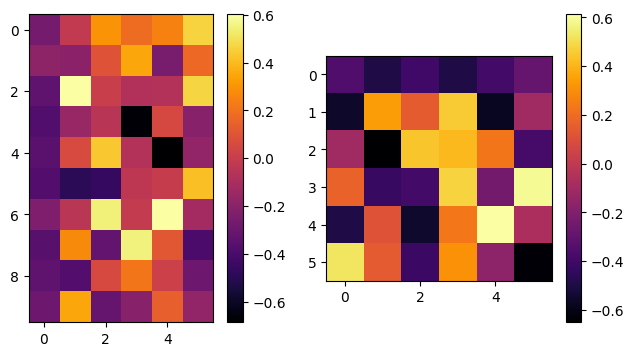

Singular values are: [3.82101671 1.24449731 1.12300146 0.76185372 0.45334829 0.23126669]


<Figure size 640x480 with 0 Axes>

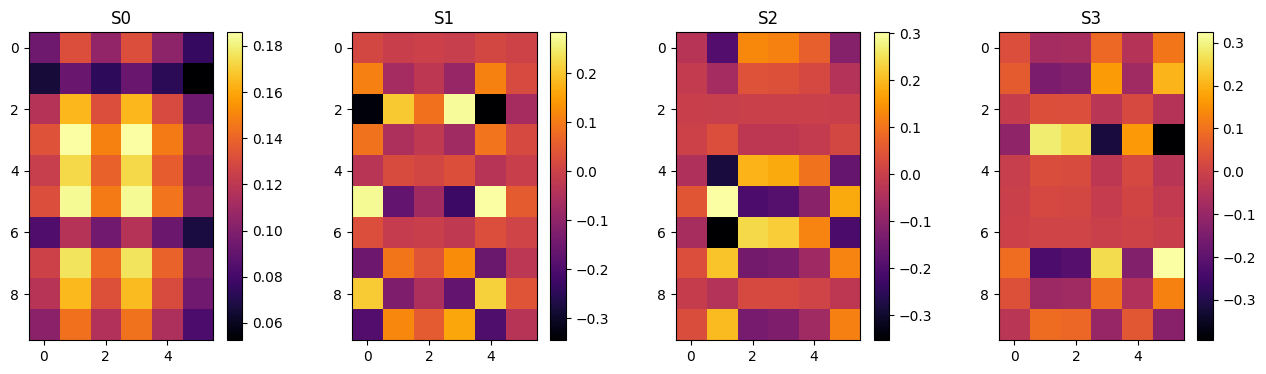

<Figure size 640x480 with 0 Axes>

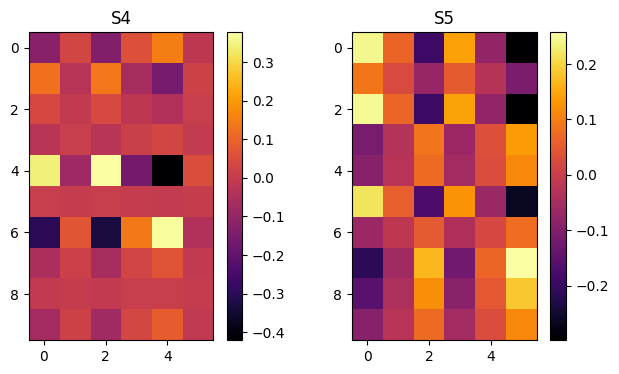

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize matrices as a color map
def plot_matrices(A,titles=[]):
    ### Credit to Professor Andrew Cumming for this function
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA, cmap = "inferno")
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

# create a 10 x 6 matrix filled with random numbers (uniform between 0 and 1)
m = 10
n = 6
A = np.random.rand(m*n).reshape(m, n)

# do SVD
U, Sdiag, V_T = np.linalg.svd(A, full_matrices=False)

plot_matrices([U, V_T])
print(f"Singular values are: {Sdiag}")

Ai = np.zeros((n, m, n))

for i in range(n):
    Ai[i]= np.outer(U[:,i], V_T[i,:])

plot_matrices(Ai[:], [f"S{j}" for j in range(n)])

And now to show that the sum of all of these reconstruct the original matrix:

<Figure size 640x480 with 0 Axes>

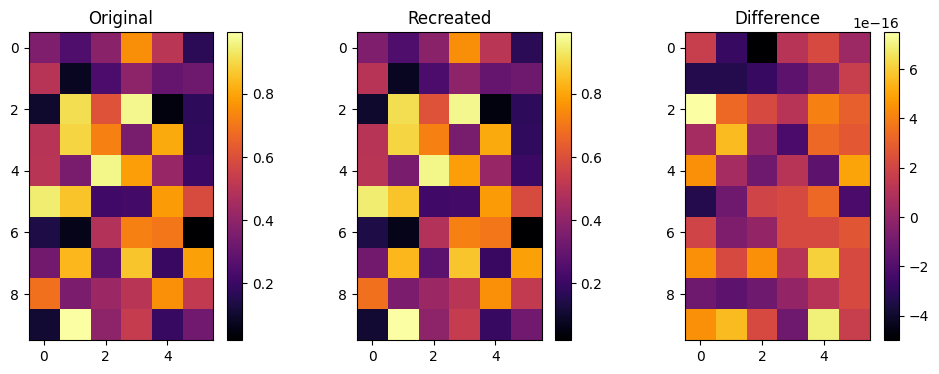

In [12]:
recreated_A = np.zeros_like(A)
for i in range(n):
    recreated_A += Sdiag[i] * Ai[i]

plot_matrices([A, recreated_A, A-recreated_A], ["Original", "Recreated", "Difference"])

## **c)** Truncation and Accuracy

Now try truncating the sum in equation, i.e. take only the n largest singular values in the sum. Calculate the mean error between the reconstructed matrix and the original matrix as a function of n.

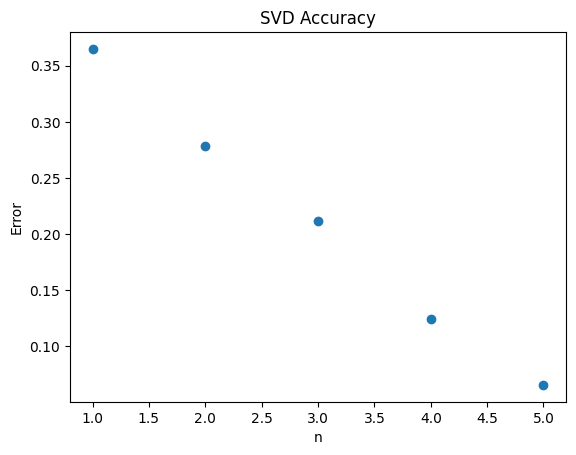

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy(A, recreated_A):
    return np.linalg.norm(A - recreated_A) / np.linalg.norm(A)

def do_SVD(m = 10, n = 6, plot = True):
    # create an m x n matrix filled with random numbers (uniform between 0 and 1)
    A = np.random.rand(m*n).reshape(m,n)

    # do SVD
    U, Sdiag, V_T = np.linalg.svd(A, full_matrices=False)

    acc = []
    truncate = np.arange(1, len(V_T))

    for n in truncate:

        recreated_A = np.zeros_like(A)

        for i in range(n):
            recreated_A += Sdiag[i] * np.outer(U[:, i], V_T[i,:])

        # Get the accuracy for each truncation value
        acc.append(accuracy(A, recreated_A))

    if plot:
        plt.scatter(truncate, acc)
        plt.xlabel('n')
        plt.ylabel('Error')
        plt.title('SVD Accuracy')

    return acc, truncate


acc, n = do_SVD()

To prove the relationship, I've created a much larger array. This shows more completely the accuracy is changed by how much you truncate the matrices by.

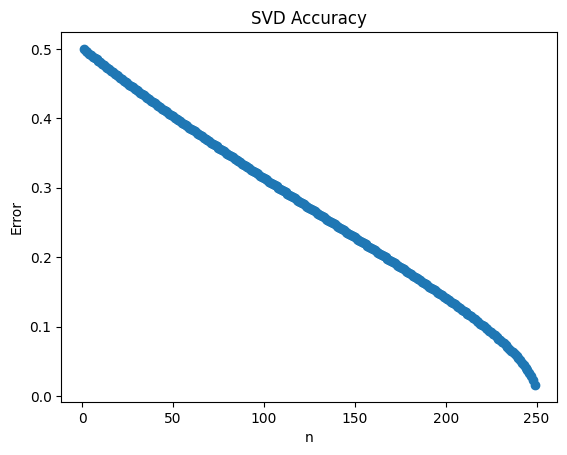

In [20]:
acc, n = do_SVD(250, 1000)

## **d)** Test on an image

<Figure size 640x480 with 0 Axes>

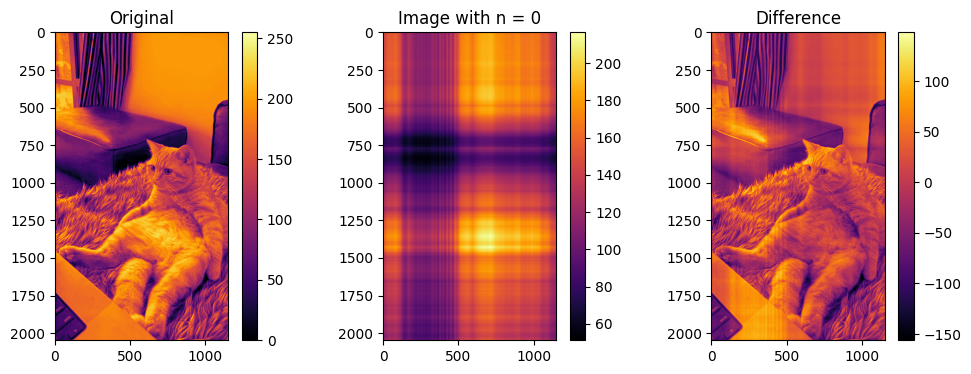

<Figure size 640x480 with 0 Axes>

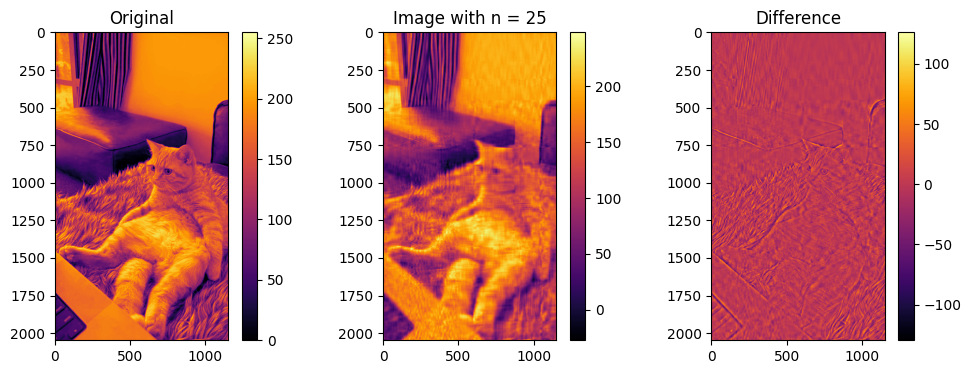

<Figure size 640x480 with 0 Axes>

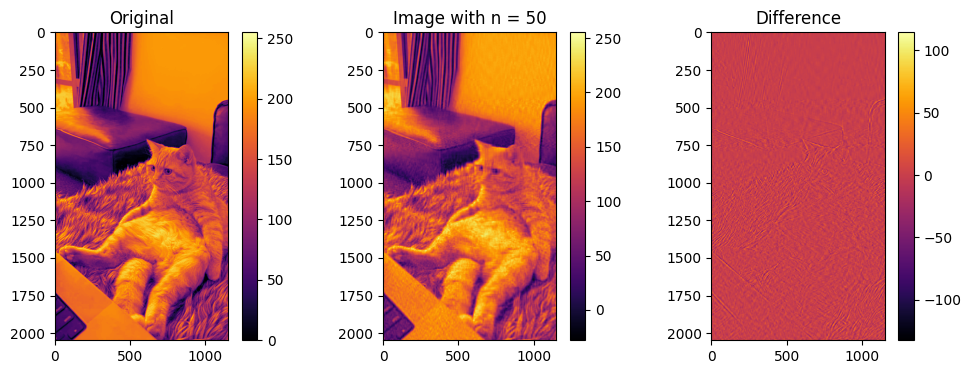

<Figure size 640x480 with 0 Axes>

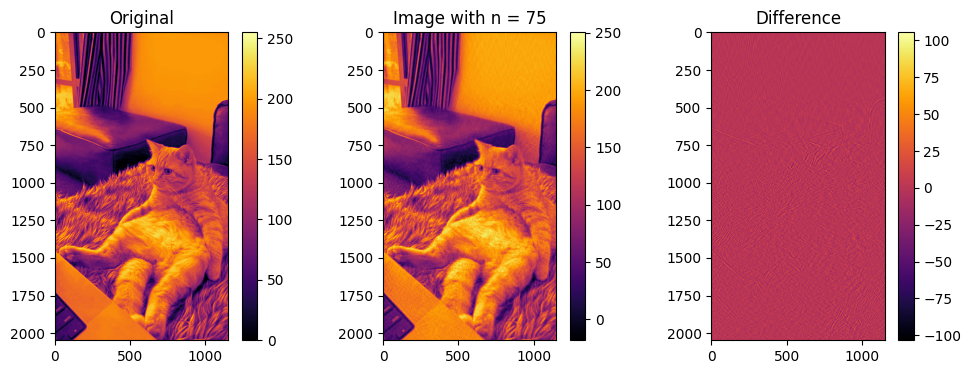

<Figure size 640x480 with 0 Axes>

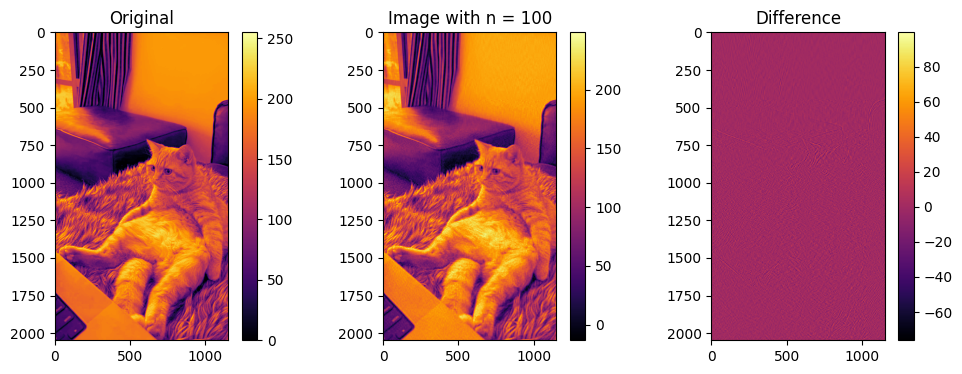

In [28]:
from PIL import Image

def do_SVD(A, truncate):
    # do SVD
    U, S, V_T = np.linalg.svd(A, full_matrices=False)

    recreated_A = np.zeros(A.shape)

    for i in range(n):
        recreated_A += S[i] * np.outer(U[:, i], V_T[i])

    return recreated_A

def image_compression(A, plot = True, n = None):
    U, S, V = np.linalg.svd(A)
    fig_count = 2
    
    if n == None:
        # Get a list of truncation values
        truncate = range(1, 110, 25)
        for i in range(len(truncate)):

            n = truncate[i]
            # Construct the diagonal matrix from the top k singular values
            S_matrix = np.diag(S[:n])

            # Recompute the original matrix
            recreated_A = U[:, :n] @ S_matrix @ V[:n, :]

            orig_x = np.size(A, 0)
            orig_y = np.size(A, 1)
            comp = (n*(orig_x + orig_y)) / (orig_x * orig_y)
            #print(f"Compression Ratio at n = {n}: {n} * ({orig_x} + {orig_y})/({orig_x}*{orig_y}) = {comp}")

            if plot:
                plot_matrices([A, recreated_A, A - recreated_A], ["Original", f"Image with n = {n-1}", "Difference"])

    else:
        U, S, V_T = np.linalg.svd(A, full_matrices=False)
        new_u = U[:, :n]
        new_v = V_T[:n, :]
        S_matrix = np.diag(S[:n])
        
        recreated_A = np.zeros(A.shape)

        for i in range(n):
            recreated_A += S[i] * np.outer(U[:, i], V_T[i])

        old_size = np.size(A, 0) * np.size(A, 1)
        new_size = np.size(new_u, 0) * np.size(new_u, 1) + np.size(new_v, 0) * np.size(new_v, 1) + np.size(S_matrix, 0) * np.size(S_matrix, 1)

        print(f"Original Size: {old_size}")
        print(f"New Size: {new_size}")
        print(f"Assuming each pixel is stored in 8 bits (1 byte), the original image takes up {old_size} bytes and the new image takes up {new_size} bytes.")
        print(f"Compression Ratio: {new_size}/{old_size} = {new_size/old_size}")

        # Recompute the original matrix
        recreated_A = new_u @ S_matrix @ new_v

        if plot:
            plot_matrices([recreated_A], [f"Image with n = {n-1}"])

img = Image.open('A4_Image.jpg')
R = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
G = np.asarray(img)[:,:,1]
B = np.asarray(img)[:,:,2]

# Show truncated images for different truncations n
_ = image_compression(R)


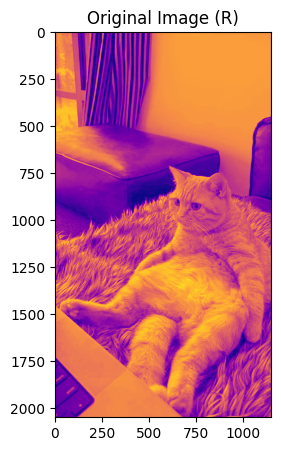

Original Size: 2359296
New Size: 680000
Assuming each pixel is stored in 8 bits (1 byte), the original image takes up 2359296 bytes and the new image takes up 680000 bytes.
Compression Ratio: 680000/2359296 = 0.2882215711805556


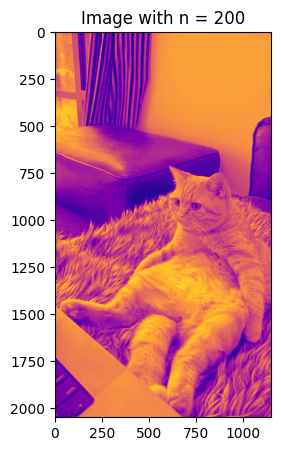

In [7]:
# Plot the original image
plt.figure(1, figsize=(10, 5))
plt.imshow(R, cmap = "plasma")
plt.title('Original Image (R)')
plt.show()

_ = image_compression(R, n = 200)

Truncating the SVD at n = 200 gives a fairly accurate and detailed recreation of the original image. This is a compression ratio of 0.29. Assuming each pixel is stored in 8 bits (1 byte), the original image takes up ~2.4 MB and the new image takes up ~ 0.68 MB.

# **Question 2 - Fitting Planetary Orbits**

## **a)** Levenberg-Marquardt

Use the Levenberg-Marquardt method to fit the orbital parameters of a planet. The parameters are:
- The orbital period $P$, in days
- The planet mass $M_P$, in Jupiter masses
- The eccentricity of the orbit $e$, between 0 and 1
- The argument of the periastron $\omega$, in radians
- The time of pericenter $t$, in days
- The overall velocity offset $v$, in m/s

The Levenberg-Marquardt Method is:
1. Define a parameter $\lambda$ with a small starting value.
2. Using a quadratic expansion around $x_n$: $$f(x) = f(x_n) + (x - x_n)\frac{df}{dx}|_{x_n} + \frac{(x - x_n)^2}{2}\frac{d^2f}{dx^2}|_{x_n}$$
we find an updated value of the location of the minimum $x_{n+1}$ by minimising this: $$ \frac{df}{dx} = 0 \rightarrow \frac{df}{dx}|_{x_n} + (x_{n+1} - x_n)\frac{d^2f}{dx^2}|_{x_n} = 0 \rightarrow x_{n+1} = n_x - (\frac{d^2f}{dx^2}|_{x_n})^{-1}\frac{df}{dx}|_{x_n}$$
 In multiple dimensions, this is: $$f(\vec{x}) = f(\vec{x_n}) + (\vec{x} - \vec{x_n})\cdot\vec{\nabla f}(\vec{x_n}) + 1/2 (\vec{x} - \vec{x_n})\cdot H \cdot (\vec{x} - \vec{x_n})$$ where $H$ is the Hessian matrix $$(H)_{ij} = \frac{\partial^2f}{\partial x_i \partial x_j}$$ so the update becomes: $$ \vec{x_{n+1}} = \vec{x_n} - H^{-1}\cdot \vec{\nabla}f(\vec{x_n})$$
2. Solve as with Newton's method, but multiply the diagonal elements of $A^TA$ by $(1 + \lambda)$.
3. If $\chi^2$ with the new parameters $a_{n+1}$ is greater than with the current set of parameters $a_n$ then increase $\lambda$ by a factor of 10, go back to $a_n$ and try again.
4. If $\chi^2$ of $a_{n+1}$ is smaller than $\chi^2$ of $a_n$ then reduce $\lambda$ by a factor of 10 and accept $a_{n+1}$.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def rv(t, P, a):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = a
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

def get_derivative(t, P, params):
    # Calculates the analytic derivative of the radial velocity function with respect to each parameter
    v = rv(t, P, params)
    A = np.zeros([len(t), len(params)])
    
    change = 1e-8
    changed_params = np.copy(params) * (1 + change)

    v0 = rv(t, P, np.array([changed_params[0], params[1], params[2], params[3], params[4]]))
    v1 = rv(t, P, np.array([params[0], changed_params[1], params[2], params[3], params[4]]))
    v2 = rv(t, P, np.array([params[0], params[1], changed_params[2], params[3], params[4]]))
    v3 = rv(t, P, np.array([params[0], params[1], params[2], changed_params[3], params[4]]))
    v4 = rv(t, P, np.array([params[0], params[1], params[2], params[3], changed_params[4]]))

    A[:, 0] = (v0 - v) / (changed_params[0] - params[0])
    A[:, 1] = (v1 - v) / (changed_params[1]- params[1])
    A[:, 2] = (v2 - v) / (changed_params[2]- params[2])
    A[:, 3] = (v3 - v) / (changed_params[3]- params[3])
    A[:, 4] = (v4 - v) / (changed_params[4]- params[4])
    
    return v, A


In [57]:
# Observations
# These are for HD145675 from Butler et al. 2003
tobs, vobs, eobs = np.loadtxt('A4_Orbital_Data.txt', unpack=True) # Read in data
# tobs = observation times
# vobs = observed velocities
# eobs = error in the observed velocities

# The orbital period of this planet is P = 1724 days
P = 1724

initial_params = np.array([1, 1e-3, 1e-3, 1e-3, 1e-3]) # mp, e, omega, tp, v0
param_history = np.array([initial_params.copy()])


chisq = 1.0
lam = 1e-3

alpha = 0.2

while chisq > 1e-6:
    cur_params = param_history[-1]
    v, A = get_derivative(tobs, P, cur_params)
    
    A[:, 0] = A[:, 0] / eobs
    A[:, 1] = A[:, 1] / eobs
    A[:, 2] = A[:, 2] / eobs
    A[:, 3] = A[:, 3] / eobs
    A[:, 4] = A[:, 4] / eobs

    # Compute Residuals
    res = (v - vobs) / eobs

    # Calculate the update to the new parameters
    lhs = (A.T@A)
    lhs = lhs@ (np.identity(len(cur_params)) * (1 + lam))
    rhs = -A.T@res
    d_params = np.linalg.inv(lhs)@rhs

    cur_params1 = cur_params + alpha*d_params # Artificially reduce step to avoid overshooting e = 1

    v1, A1 = get_derivative(tobs, P, cur_params1)

    A1[:, 0] = A1[:, 0] / eobs
    A1[:, 1] = A1[:, 1] / eobs
    A1[:, 2] = A1[:, 2] / eobs
    A1[:, 3] = A1[:, 3] / eobs
    A1[:, 4] = A1[:, 4] / eobs

    res1 = (v1-vobs) / eobs
    chisq = np.sum(res**2)
    chisq1 = np.sum(res1**2)

    if chisq1 > chisq: # If the new chi squared is higher, increase lambda and reject the new parameters
        lam = lam * 10

    else: # If the new chi squared is lower, accept the new parameters
        lam = lam / 10
        param_history = np.vstack((param_history, cur_params1))

        # Break if improvement becomes too small
        if (chisq - chisq1) < 1e-3:
            break

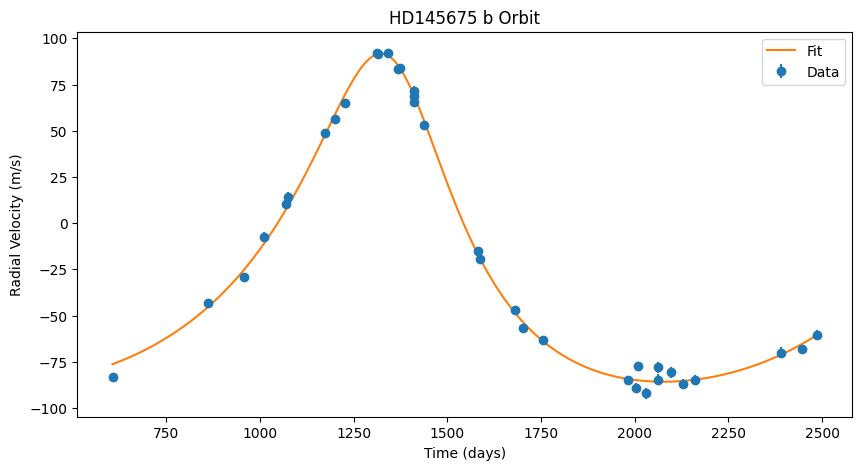

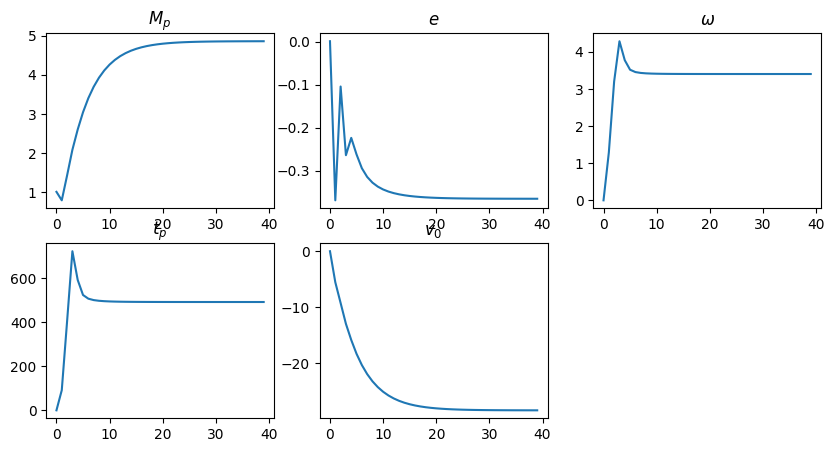

In [61]:
# Plot the resulting fit
t = np.linspace(tobs[0], tobs[-1], 1000)

plt.figure(1, figsize=(10, 5))
plt.errorbar(tobs, vobs, yerr=eobs, fmt='o', label='Data')
plt.plot(t, rv(t, P, param_history[-1]), label='Fit')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('HD145675 b Orbit')
plt.legend()

# Plot history of each parameter on a subplot
plt.figure(2, figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.plot(param_history[:, 0])
plt.title('$M_p$')

plt.subplot(2, 3, 2)
plt.plot(param_history[:, 1])
plt.title('$e$')

plt.subplot(2, 3, 3)
plt.plot(param_history[:, 2])
plt.title('$\omega$')

plt.subplot(2, 3, 4)
plt.plot(param_history[:, 3])
plt.title('$t_p$')

plt.subplot(2, 3, 5)
plt.plot(param_history[:, 4])
plt.title('$v_0$')

plt.show()

We can see here that the eccentricity from the fit is a negative. This is because there is a degeneracy between $e$ and the angles $\omega_p$ and $t_p$. We can adjust this to fix the eccentricity as positive. When we do this, we also havet to adjust $\omega_p + \pi$ and $t_p + P/2$, as you will see below.

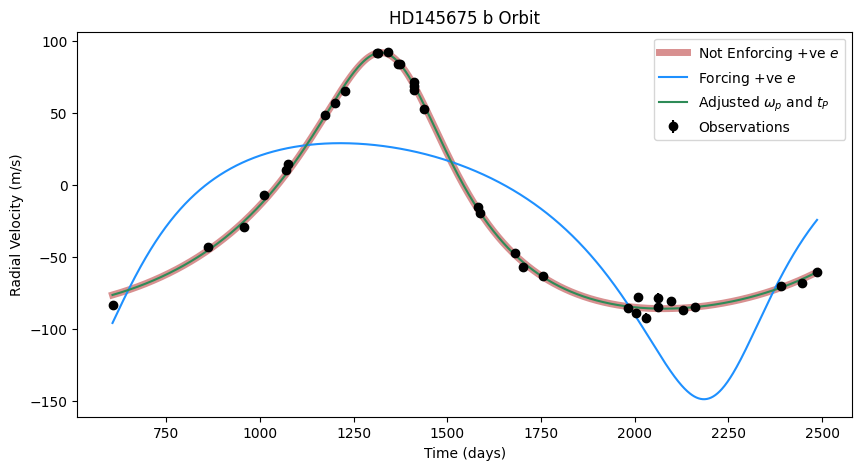

In [69]:
fin_params = param_history[-1]

# Change the sign of eccentricity
e_adj_param = np.copy(fin_params)
e_adj_param[1] = -fin_params[1]

all_adj_param = np.copy(fin_params)
all_adj_param[1] = -fin_params[1]
all_adj_param[3] = (fin_params[3] + P/2) % P
all_adj_param[2] = (fin_params[2] + np.pi) % (2*np.pi)

plt.figure(1, figsize=(10, 5))
plt.errorbar(tobs, vobs, yerr=eobs, fmt='o', label='Observations', color = "black")
plt.plot(t, rv(t, P, fin_params), label='Not Enforcing +ve $e$', color = "firebrick", linewidth = 5, alpha = 0.5)
plt.plot(t, rv(t,P, e_adj_param), label=r'Forcing +ve $e$', color = "dodgerblue")
plt.plot(t, rv(t, P, all_adj_param), label='Adjusted $\omega_p$ and $t_P$', color = "seagreen")
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('HD145675 b Orbit')
plt.legend()

## **b)** Covariance

Evaluate C for the best fit using Levenberg-Marquardt and compare it to the covariance from Markov-Chain Monte-Carlo.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def MCMC_Exoplanet():
    seed = 42
    rng = np.random.default_rng(seed)

    ### MCMC Exoplanet Fitting ### 
    # Solutions from the GitHub
    def f(x, tobs, vobs, eobs):
        chisq = np.sum(((vobs - rv(tobs, P, x)) / eobs)**2)
        return -chisq/2

    # Observations
    # These are for HD145675 from Butler et al. 2003
    tobs, vobs, eobs = np.loadtxt('A4_Orbital_Data.txt', unpack=True)

    # Number of samples to generate
    N = 10**5
    x = np.zeros((N, 5))

    # initial guess
    # P, mp, e, omega, tp, v0 
    P = 1724
    x[0] = [1.0, 0.0, 0.0, 0.0, 0.0]
    # and the widths for the jumps
    widths = (0.03, 0.03, 0.03, 3.0, 1.0)

    count = 0

    for i in range(N - 1):
        
        # Proposal
        ii = np.random.randint(0, 5)
        x_try = np.copy(x[i])
        x_try[ii] += rng.normal(scale = widths[ii])
        
        # Accept the move or stay where we are
        u = rng.uniform()
        if u <= np.exp(f(x_try, tobs,vobs,eobs) - f(x[i], tobs,vobs,eobs)):
            x[i+1] = np.copy(x_try)
            count = count + 1
        else:
            x[i+1] = np.copy(x[i])
    print("Acceptance fraction = %g" % (count/N,))
    
    # Reject burn-in phase
    x1 = x[int(N/2):]
    # Move the angles to within 0 to 2pi
    x1[:,2] = x1[:,2] % (2*np.pi)
    x1[:,3] = x1[:,3] % P

    return x1

MCMC_results = MCMC_Exoplanet()

Acceptance fraction = 0.39538


In [77]:
LM_Covariance = np.linalg.inv(A.T @ A)
MCMC_Covariance = np.cov(MCMC_results.T)

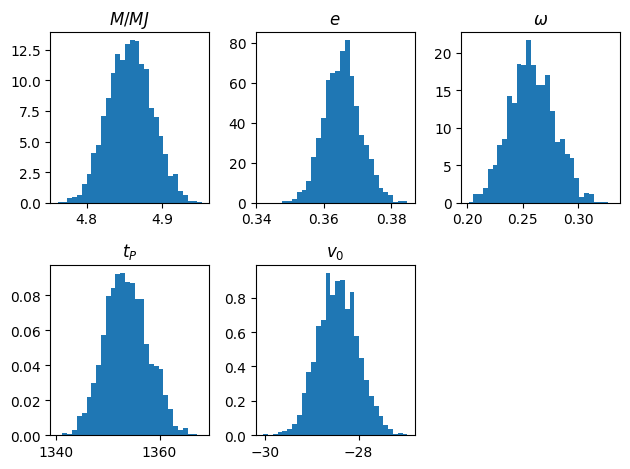

In [78]:
titles = (r'$M/MJ$', r'$e$', r'$\omega$', r'$t_P$', r'$v_0$')
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.hist(MCMC_results[:, i], density=True, bins=30)
plt.tight_layout()
plt.show()

   parameter         MCMC           LS     MCMC var       LS var    frac diff
      $M/MJ$      4.85761      4.85738  0.000842752  0.000848327  -0.00329655
         $e$      0.36547     0.365715  2.91432e-05  2.86817e-05   0.00798083
    $\omega$     0.258274     0.256895  0.000410413   0.00037593    0.0438527
       $t_P$      1353.65      1353.37      17.2846      16.1278    0.0346203
       $v_0$     -28.4382     -28.4506     0.185787     0.183564   0.00601884
[[ 8.483e-04  6.026e-05 -5.148e-05 -1.314e-02 -4.162e-03]
 [ 6.026e-05  2.868e-05  8.136e-06  2.955e-03  3.419e-04]
 [-5.148e-05  8.136e-06  3.759e-04  7.257e-02  4.852e-04]
 [-1.314e-02  2.955e-03  7.257e-02  1.613e+01  6.831e-02]
 [-4.162e-03  3.419e-04  4.852e-04  6.831e-02  1.836e-01]] 

 [[ 8.428e-04 -5.980e-05 -7.782e-05 -1.859e-02 -4.130e-03]
 [-5.980e-05  2.914e-05 -5.984e-06 -2.356e-03 -3.379e-04]
 [-7.782e-05 -5.984e-06  4.104e-04  7.905e-02  7.618e-04]
 [-1.859e-02 -2.356e-03  7.905e-02  1.728e+01  1.287e-01]
 [-4.1

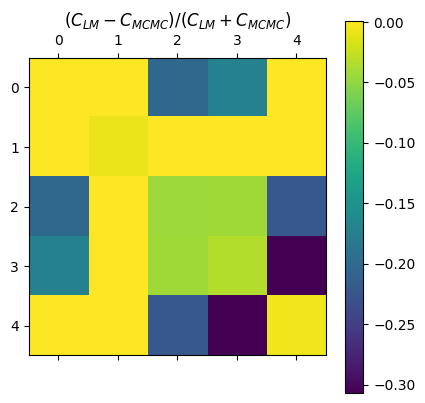

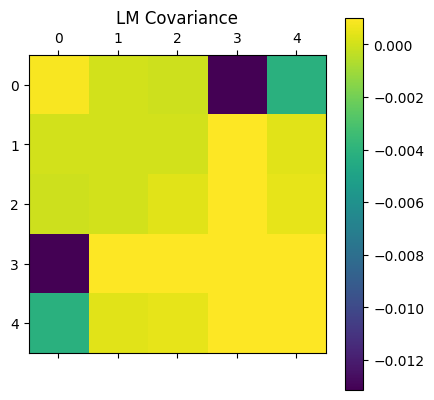

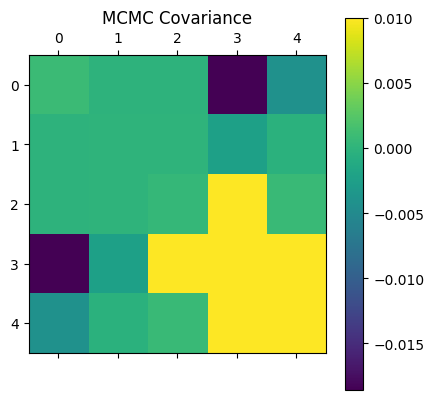

In [88]:
# compare with the least squares results
print('%12s %12s %12s %12s %12s %12s' % ('parameter', 'MCMC', 'LS', 'MCMC var', 'LS var', 'frac diff'))
for i in range(5):
    print(f"%12s %12lg %12lg %12lg %12lg %12lg" % 
          (titles[i], np.mean(MCMC_results[:,i]), all_adj_param[i], np.var(MCMC_results[:,i]), LM_Covariance[i,i], 
            np.divide(np.var(MCMC_results[:,i]) - LM_Covariance[i,i], np.var(MCMC_results[:,i]) + LM_Covariance[i,i])))

with np.printoptions(precision=3, suppress=False):
    print(LM_Covariance,"\n\n", MCMC_Covariance)

plt.matshow(np.divide(LM_Covariance - MCMC_Covariance, MCMC_Covariance + LM_Covariance), vmax = 1e-3)
plt.colorbar()
plt.title("$(C_{LM} - C_{MCMC})/(C_{LM} + C_{MCMC})$")
plt.show()

plt.matshow(LM_Covariance, vmax = 1e-3)
plt.colorbar()
plt.title("LM Covariance")
plt.show()

plt.matshow(MCMC_Covariance, vmax = 1e-2)
plt.colorbar()
plt.title("MCMC Covariance")
plt.show()

We can see here that there is very good agreement between the parameters, but the covariance matrices look quite different due to the different approaches each algorithm takes.